# Our Approach - Single Queue

In [1]:
import sys
from pathlib import Path
from threading import Thread
import time
import matplotlib.pyplot as plt
project_directory = Path.cwd().parent / 'SingleQueue'
# Add 'SingleQueue' directory to sys.path to access its modules
sys.path.insert(0, str(project_directory))
# Now you can import Client and Server
from client import Client
from server import Server


In [2]:
def run_benchmark(server,client, num_keys, num_iterations=5):
    """
    Run the benchmark for PUT and GET operations on the custom server via Client.
    
    :param client: The client instance connected to the server.
    :param num_keys: The number of keys to test with.
    :param num_iterations: The number of times to run the benchmark.
    :return: A tuple of (average put time, average get time).
    """
    put_times = []
    get_times = []

    for _ in range(num_iterations):
        server.reset_state()  # Assuming this method is implemented in the client

        keys = [f'key{i}' for i in range(1, num_keys + 1)]
        
        # Reset the server state here if possible, e.g., client.reset_server()
        
        # Benchmark PUT operation
        start_time = time.perf_counter()
        for key in keys:
            client.put(key, b'value')
        put_times.append(time.perf_counter() - start_time)

        # Benchmark GET operation
        start_time = time.perf_counter()
        for key in keys:
            client.get(key)
        get_times.append(time.perf_counter() - start_time)

    # Calculate average times
    avg_put_time = sum(put_times) / len(put_times)
    avg_get_time = sum(get_times) / len(get_times)

    return avg_put_time, avg_get_time

#### Starting Server

In [3]:
def start_server(server_instance):
    server_instance.run()

# Start the server thread
server = Server()
server_thread = Thread(target=start_server, args=(server,))
server_thread.daemon = True
server_thread.start()

# Ensure the server has time to start up
time.sleep(1)

#### Client doing PUT/GET requests

In [4]:
# Initialize Client
client = Client()  # Connect to the server here

# Range of number of keys
num_keys_range = range(100, 10001, 1000)

# Lists for average times
avg_put_times = []
avg_get_times = []

# Run the benchmark
for num_keys in num_keys_range:
    avg_put_time, avg_get_time = run_benchmark(server,client, num_keys)
    avg_put_times.append(avg_put_time)
    avg_get_times.append(avg_get_time)

Have_ID
ID recieved is -1


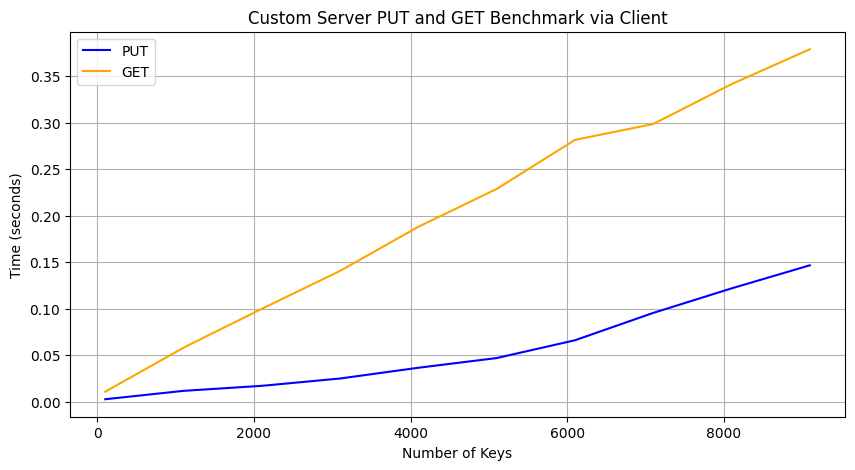

In [5]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(num_keys_range, avg_put_times, label='PUT', color='blue')
plt.plot(num_keys_range, avg_get_times, label='GET', color='orange')
plt.xlabel('Number of Keys')
plt.ylabel('Time (seconds)')
plt.legend()
plt.title('Custom Server PUT and GET Benchmark via Client')
plt.grid(True)
plt.show()

#  Redis

In [13]:
import redis
import time
import matplotlib.pyplot as plt

In [15]:
def run_benchmark(redis_client, num_keys, num_iterations=5):
    """
    Run the benchmark for PUT (SET) and GET operations on Redis.
    
    :param redis_client: The Redis client instance.
    :param num_keys: The number of keys to test with.
    :param num_iterations: The number of times to run the benchmark.
    :return: A tuple of (average put time, average get time).
    """
    put_times = []
    get_times = []

    for _ in range(num_iterations):
        # Generate keys and values
        keys = [f'key{i}' for i in range(1, num_keys + 1)]
        values = ['value' * (i % 100 + 1) for i in range(1, num_keys + 1)]  # Vary value sizes

        # Clear the database before PUT operations
        redis_client.flushdb()
        time.sleep(1)  # Allow some time for the flush to complete

        # Benchmark PUT (SET) operation
        start_time = time.perf_counter()
        for key, value in zip(keys, values):
            redis_client.set(key, value)
        put_times.append(time.perf_counter() - start_time)

        # Benchmark GET operation
        start_time = time.perf_counter()
        for key in keys:
            redis_client.get(key)
        get_times.append(time.perf_counter() - start_time)

    # Calculate average times
    avg_put_time = sum(put_times) / len(put_times)
    avg_get_time = sum(get_times) / len(get_times)

    return avg_put_time, avg_get_time


In [16]:
# Initialize Redis client
redis_client = redis.StrictRedis(host='localhost', port=6380, db=0)

# Range of number of keys
num_keys_range = range(100, 10001, 1000)

# Lists for average times
avg_put_times = []
avg_get_times = []

# Run the benchmark
for num_keys in num_keys_range:
    avg_put_time, avg_get_time = run_benchmark(redis_client, num_keys)
    avg_put_times.append(avg_put_time)
    avg_get_times.append(avg_get_time)


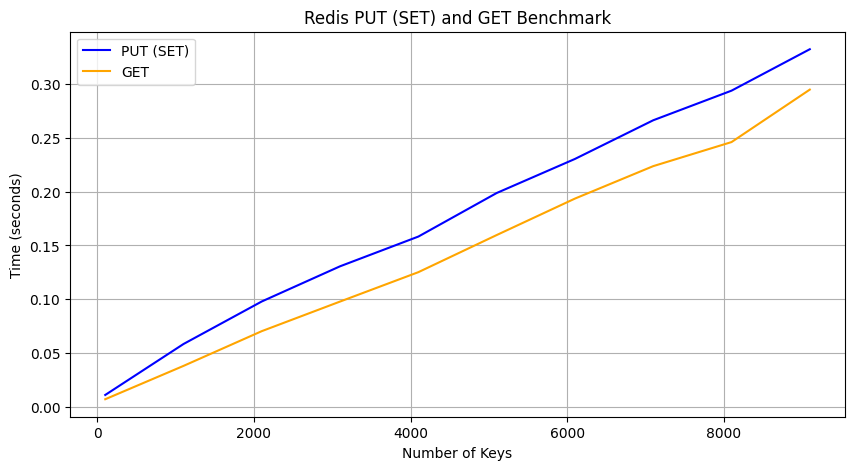

In [17]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(num_keys_range, avg_put_times, label='PUT (SET)', color='blue')
plt.plot(num_keys_range, avg_get_times, label='GET', color='orange')
plt.xlabel('Number of Keys')
plt.ylabel('Time (seconds)')
plt.legend()
plt.title('Redis PUT (SET) and GET Benchmark')
plt.grid(True)
plt.show()

# Memcache

In [ ]:
!pip install python-memcached

In [9]:
import memcache
import time
import matplotlib.pyplot as plt

In [10]:
def run_benchmark(memcached_client, num_keys, num_iterations=5):
    """
    Run the benchmark for PUT and GET operations on Memcached.
    
    :param memcached_client: The Memcached client instance.
    :param num_keys: The number of keys to test with.
    :param num_iterations: The number of times to run the benchmark.
    :return: A tuple of (average put time, average get time).
    """
    put_times = []
    get_times = []

    for _ in range(num_iterations):
        # Generate keys
        keys = [f'key{i}' for i in range(1, num_keys + 1)]
        values = ['value' * (i % 100 + 1) for i in range(1, num_keys + 1)]  # Vary value sizes

        # Clear the cache before PUT operations
        memcached_client.flush_all()
        time.sleep(1)  # Allow some time for the flush to complete

        # Benchmark PUT operation
        start_time = time.perf_counter()
        for key, value in zip(keys, values):
            memcached_client.set(key, value)
        put_times.append(time.perf_counter() - start_time)

        # Benchmark GET operation
        start_time = time.perf_counter()
        for key in keys:
            memcached_client.get(key)
        get_times.append(time.perf_counter() - start_time)

    # Calculate average times
    avg_put_time = sum(put_times) / len(put_times)
    avg_get_time = sum(get_times) / len(get_times)

    return avg_put_time, avg_get_time

In [11]:
# Initialize Memcached client
memcached_client = memcache.Client(['localhost:11211'])

# Range of number of keys
num_keys_range = range(100, 10001, 1000)

# Lists for average times
avg_put_times = []
avg_get_times = []

# Run the benchmark
for num_keys in num_keys_range:
    avg_put_time, avg_get_time = run_benchmark(memcached_client, num_keys)
    avg_put_times.append(avg_put_time)
    avg_get_times.append(avg_get_time)


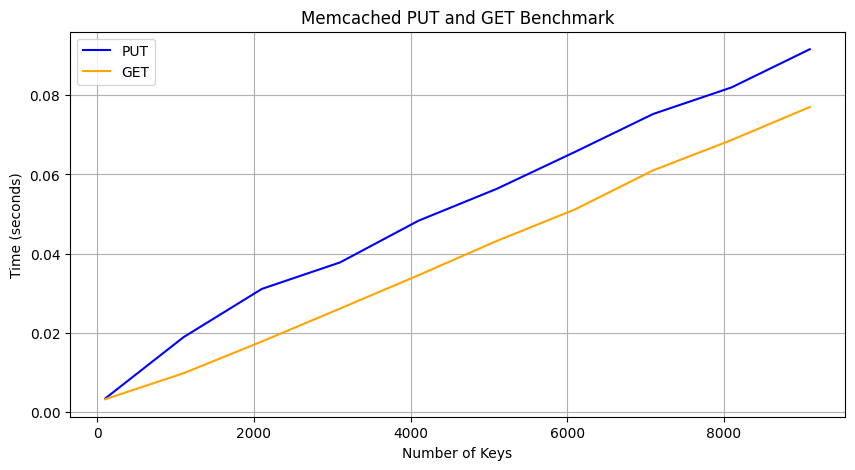

In [12]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(num_keys_range, avg_put_times, label='PUT', color='blue')
plt.plot(num_keys_range, avg_get_times, label='GET', color='orange')
plt.xlabel('Number of Keys')
plt.ylabel('Time (seconds)')
plt.legend()
plt.title('Memcached PUT and GET Benchmark')
plt.grid(True)
plt.show()

# Zookeeper

In [ ]:
!pip install kazoo

In [6]:
import time
import logging
from kazoo.client import KazooClient
from kazoo.exceptions import NodeExistsError, NoNodeError
import matplotlib.pyplot as plt
from threading import Thread


In [7]:
def run_benchmark(zk, num_znodes, num_iterations=3):
    # Ensure the parent path exists
    zk.ensure_path('/test')
    
    # Prepare znode paths
    znodes = [f'/test/znode{i}' for i in range(num_znodes)]
    
    # Warm-up phase: Ensure all nodes are created for the warm-up
    for znode in znodes:
        try:
            zk.create(znode, b'value', ephemeral=True)
        except NodeExistsError:
            pass  # Node already exists, continue

    # Warm-up GET operations: Get each node to ensure they're in the cache
    for znode in znodes:
        try:
            zk.get(znode)
        except NoNodeError:
            pass  # Node may have been deleted, continue

    # PUT Benchmark
    put_times = []
    for _ in range(num_iterations):
        start_time = time.perf_counter()
        for znode in znodes:
            try:
                zk.create(znode, b'value', ephemeral=True)
            except NodeExistsError:
                pass  # Node already exists, continue
        end_time = time.perf_counter()
        put_times.append(end_time - start_time)

    # Ensure nodes exist for GET benchmark
    for znode in znodes:
        try:
            zk.create(znode, b'value', ephemeral=True)
        except NodeExistsError:
            pass  # Node already exists, continue

    # GET Benchmark
    get_times = []
    for _ in range(num_iterations):
        start_time = time.perf_counter()
        for znode in znodes:
            zk.get(znode)
        end_time = time.perf_counter()
        get_times.append(end_time - start_time)

    # Cleanup after benchmark
    for znode in znodes:
        try:
            zk.delete(znode)
        except NoNodeError:
            pass  # Node may have been deleted, continue
        
    avg_put_time = sum(put_times) / len(put_times)
    avg_get_time = sum(get_times) / len(get_times)

    return avg_put_time, avg_get_time


In [8]:
# Initialize a connection to the ZooKeeper server
zk = KazooClient(hosts='localhost:2181')
zk.start()

# Range of number of znodes to use for the benchmark
num_znodes_range = range(100, 10001, 1000)

# Lists to store the average execution times for PUT and GET operations
avg_put_times = []
avg_get_times = []

try:
    # Benchmark for different numbers of znodes
    for num_znodes in num_znodes_range:
        avg_put_time, avg_get_time  = run_benchmark(zk, num_znodes, num_iterations=3)
        avg_put_times.append(avg_put_time)
        avg_get_times.append(avg_get_time)
except Exception as e:
    logging.error("An error occurred during benchmarking: %s", e, exc_info=True)
finally:
    # Close the connection to the ZooKeeper server
    zk.stop()

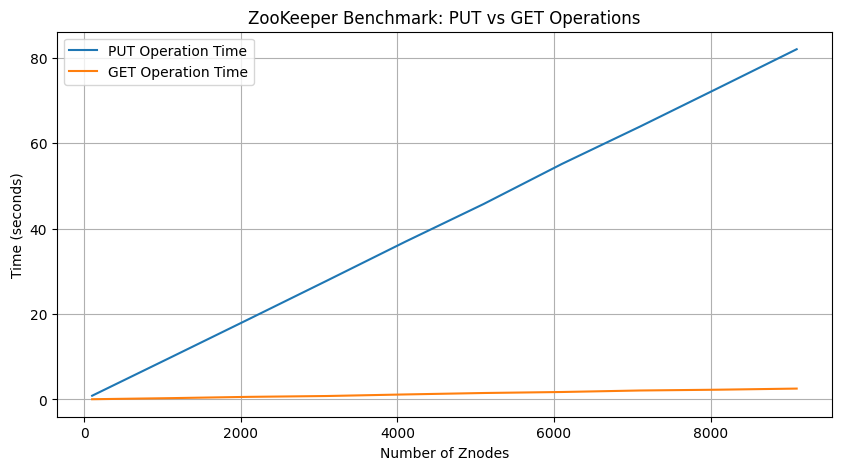

In [9]:
# Plot the graph
plt.figure(figsize=(10, 5))
plt.plot(num_znodes_range, avg_put_times, label='PUT Operation Time')
plt.plot(num_znodes_range, avg_get_times, label='GET Operation Time')
plt.xlabel('Number of Znodes')
plt.ylabel('Time (seconds)')
plt.title('ZooKeeper Benchmark: PUT vs GET Operations')
plt.legend()
plt.grid(True)
plt.show()

You can think of Znodes in Apache ZooKeeper as key-value pairs. Each Znode has a path, which acts as the key, and can store a small amount of data, which acts as the value. This key-value pair mechanism is how ZooKeeper maintains its data hierarchy.

 Here's an analogy: if you consider ZooKeeper as a distributed, highly available filesystem or directory service, then the Znodes are like files and directories in this system. Just like files/directories have names and can contain data (or other files/directories), Znodes have paths and can contain data (or other Znodes). The key (the Znode's path) is unique and is used to locate and manipulate the value (the data stored in the Znode).

In the provided code, the term "number of Znodes" refers to the quantity of these key-value pairs that the benchmark script will handle. It creates a specified number of Znodes (num_znodes) and performs operations on them to evaluate performance characteristics such as latency or throughput for create (PUT) and read (GET) operations within the ZooKeeper ensemble.